# Ridge Regression (gradient descent)

Ridge regression i simpleted  via gradient descent

# Fire up graphlab create

In [2]:
import graphlab


# Load in house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
sales = graphlab.SFrame('kc_house_data.gl/')

GraphLab Create

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started.

# creating some useful functions

In [4]:
import numpy as np # note this allows us to refer to numpy as np instead 

In [5]:
def get_numpy_data(data_sframe, features, output): # features and output are list here
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]

    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]

    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [6]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix,weights)

    return(predictions)

# Computing the Derivative

In [7]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        #d = 2*SUM[ error*[feature_i] ] + 2*l2_penalty*w[i].
        derivative = 2 * (np.dot(errors,feature))
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2 * (np.dot(errors,feature)) + 2*l2_penalty*weight
    return derivative

# Gradient Descent

Writing a function to perform gradient. Given a starting point we update the current weights by moving in the negative gradient direction. Gradient is the direction of *increase* and therefore the negative gradient is the direction of *decrease* and we're trying to *minimize* a cost function. 

The amount by which we move in the negative gradient *direction*  is called the 'step size'. We stop when we are 'sufficiently close' to the optimum.


In [8]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    
    #while not reached maximum number of iterations:
    a=1
    print a
    while (a<max_iterations) :
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix,weights)
                # compute the errors as predictions - output
        error = predictions - output
        print a
        
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            feature = feature_matrix[:,i]
            w =weights[i]
            if i == 0:
                     feature_is_constant = True
            else:
                     feature_is_constant = False

            d= feature_derivative_ridge(error,feature,w, l2_penalty, feature_is_constant)
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - (step_size*d)
            print i
        a = a+1
        print a
    return (weights)

# Visualizing effect of L2 penalty

In [9]:
simple_features = ['sqft_living']
my_output = 'price'

Split the dataset into training set and test set

In [10]:
train_data,test_data = sales.random_split(.8,seed=0)

We will use 'sqft_living'` to predict `'price'`. Use the  `get_numpy_data` function to get a Numpy versions of your data with only this feature, for both the `train_data` and the `test_data`. 

In [11]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

Let's set the parameters for our optimization:

In [12]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

First, let's consider no regularization.  Set the `l2_penalty` to `0.0` and run ridge regression algorithm.

In [13]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0, max_iterations=1000)
print simple_weights_0_penalty

1
1
0
1
2
2
0
1
3
3
0
1
4
4
0
1
5
5
0
1
6
6
0
1
7
7
0
1
8
8
0
1
9
9
0
1
10
10
0
1
11
11
0
1
12
12
0
1
13
13
0
1
14
14
0
1
15
15
0
1
16
16
0
1
17
17
0
1
18
18
0
1
19
19
0
1
20
20
0
1
21
21
0
1
22
22
0
1
23
23
0
1
24
24
0
1
25
25
0
1
26
26
0
1
27
27
0
1
28
28
0
1
29
29
0
1
30
30
0
1
31
31
0
1
32
32
0
1
33
33
0
1
34
34
0
1
35
35
0
1
36
36
0
1
37
37
0
1
38
38
0
1
39
39
0
1
40
40
0
1
41
41
0
1
42
42
0
1
43
43
0
1
44
44
0
1
45
45
0
1
46
46
0
1
47
47
0
1
48
48
0
1
49
49
0
1
50
50
0
1
51
51
0
1
52
52
0
1
53
53
0
1
54
54
0
1
55
55
0
1
56
56
0
1
57
57
0
1
58
58
0
1
59
59
0
1
60
60
0
1
61
61
0
1
62
62
0
1
63
63
0
1
64
64
0
1
65
65
0
1
66
66
0
1
67
67
0
1
68
68
0
1
69
69
0
1
70
70
0
1
71
71
0
1
72
72
0
1
73
73
0
1
74
74
0
1
75
75
0
1
76
76
0
1
77
77
0
1
78
78
0
1
79
79
0
1
80
80
0
1
81
81
0
1
82
82
0
1
83
83
0
1
84
84
0
1
85
85
0
1
86
86
0
1
87
87
0
1
88
88
0
1
89
89
0
1
90
90
0
1
91
91
0
1
92
92
0
1
93
93
0
1
94
94
0
1
95
95
0
1
96
96
0
1
97
97
0
1
98
98
0
1
99
99
0
1
100
100
0
1
101
101
0
1
102


Next, let's consider high regularization.  Set the `l2_penalty` to `1e11` and run ridge regression algorithm to learn the weights of your model.  Call your weights:

`simple_weights_high_penalty`

In [14]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,1e11, max_iterations=1000)
print simple_weights_high_penalty

1
1
0
1
2
2
0
1
3
3
0
1
4
4
0
1
5
5
0
1
6
6
0
1
7
7
0
1
8
8
0
1
9
9
0
1
10
10
0
1
11
11
0
1
12
12
0
1
13
13
0
1
14
14
0
1
15
15
0
1
16
16
0
1
17
17
0
1
18
18
0
1
19
19
0
1
20
20
0
1
21
21
0
1
22
22
0
1
23
23
0
1
24
24
0
1
25
25
0
1
26
26
0
1
27
27
0
1
28
28
0
1
29
29
0
1
30
30
0
1
31
31
0
1
32
32
0
1
33
33
0
1
34
34
0
1
35
35
0
1
36
36
0
1
37
37
0
1
38
38
0
1
39
39
0
1
40
40
0
1
41
41
0
1
42
42
0
1
43
43
0
1
44
44
0
1
45
45
0
1
46
46
0
1
47
47
0
1
48
48
0
1
49
49
0
1
50
50
0
1
51
51
0
1
52
52
0
1
53
53
0
1
54
54
0
1
55
55
0
1
56
56
0
1
57
57
0
1
58
58
0
1
59
59
0
1
60
60
0
1
61
61
0
1
62
62
0
1
63
63
0
1
64
64
0
1
65
65
0
1
66
66
0
1
67
67
0
1
68
68
0
1
69
69
0
1
70
70
0
1
71
71
0
1
72
72
0
1
73
73
0
1
74
74
0
1
75
75
0
1
76
76
0
1
77
77
0
1
78
78
0
1
79
79
0
1
80
80
0
1
81
81
0
1
82
82
0
1
83
83
0
1
84
84
0
1
85
85
0
1
86
86
0
1
87
87
0
1
88
88
0
1
89
89
0
1
90
90
0
1
91
91
0
1
92
92
0
1
93
93
0
1
94
94
0
1
95
95
0
1
96
96
0
1
97
97
0
1
98
98
0
1
99
99
0
1
100
100
0
1
101
101
0
1
102


This code will plot the two learned models.  (The blue line is for the model with no regularization and the red line is for the one with high regularization.)

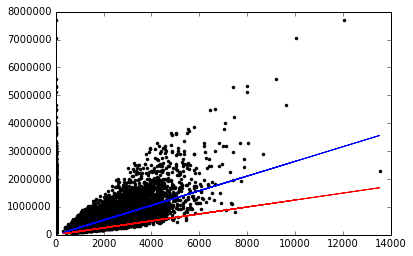

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

Computing the RSS on the TEST data for the following three sets of weights:
1. The initial weights (all zeros)
2. The weights learned with no regularization
3. The weights learned with high regularization



In [16]:
initial_weights = [0,0]
#izero = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,1e11, max_iterations=1000)
#print izero

predictions1 = predict_output(simple_test_feature_matrix,initial_weights)
                # compute the errors as predictions - output
error = predictions1 - test_output
tt1 = error*error
rss1 =tt1.sum()
print rss1

1.78427328252e+15


In [17]:
initial_weights1 = [ -1.62844686e-01 ,  2.63024369e+02]
#izero = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,1e11, max_iterations=1000)
#print izero

predictions2 = predict_output(simple_test_feature_matrix,initial_weights1)
                # compute the errors as predictions - output
error = predictions2 - test_output
tt1 = error*error
rss2 =tt1.sum()
print rss2

2.75723634605e+14


In [18]:
initial_weights = [   9.75756034 , 124.5721775 ]
#izero = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,1e11, max_iterations=1000)
#print izero

predictions3 = predict_output(simple_test_feature_matrix,initial_weights)
                # compute the errors as predictions - output
error = predictions3 - test_output
tt1 = error*error
rss3 =tt1.sum()
print rss3

6.94642113129e+14


# Running a multiple regression with L2 penalty

In [19]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

Re-inialize the weights

In [20]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

First, let's consider no regularization.  Set the `l2_penalty` to `0.0` and run ridge regression algorithm.

In [21]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size,0.0, max_iterations=1000)
print multiple_weights_0_penalty

1
1
0
1
2
2
2
0
1
2
3
3
0
1
2
4
4
0
1
2
5
5
0
1
2
6
6
0
1
2
7
7
0
1
2
8
8
0
1
2
9
9
0
1
2
10
10
0
1
2
11
11
0
1
2
12
12
0
1
2
13
13
0
1
2
14
14
0
1
2
15
15
0
1
2
16
16
0
1
2
17
17
0
1
2
18
18
0
1
2
19
19
0
1
2
20
20
0
1
2
21
21
0
1
2
22
22
0
1
2
23
23
0
1
2
24
24
0
1
2
25
25
0
1
2
26
26
0
1
2
27
27
0
1
2
28
28
0
1
2
29
29
0
1
2
30
30
0
1
2
31
31
0
1
2
32
32
0
1
2
33
33
0
1
2
34
34
0
1
2
35
35
0
1
2
36
36
0
1
2
37
37
0
1
2
38
38
0
1
2
39
39
0
1
2
40
40
0
1
2
41
41
0
1
2
42
42
0
1
2
43
43
0
1
2
44
44
0
1
2
45
45
0
1
2
46
46
0
1
2
47
47
0
1
2
48
48
0
1
2
49
49
0
1
2
50
50
0
1
2
51
51
0
1
2
52
52
0
1
2
53
53
0
1
2
54
54
0
1
2
55
55
0
1
2
56
56
0
1
2
57
57
0
1
2
58
58
0
1
2
59
59
0
1
2
60
60
0
1
2
61
61
0
1
2
62
62
0
1
2
63
63
0
1
2
64
64
0
1
2
65
65
0
1
2
66
66
0
1
2
67
67
0
1
2
68
68
0
1
2
69
69
0
1
2
70
70
0
1
2
71
71
0
1
2
72
72
0
1
2
73
73
0
1
2
74
74
0
1
2
75
75
0
1
2
76
76
0
1
2
77
77
0
1
2
78
78
0
1
2
79
79
0
1
2
80
80
0
1
2
81
81
0
1
2
82
82
0
1
2
83
83
0
1
2
84
84
0
1
2
85
85
0
1


Next, let's consider high regularization.  Set the `l2_penalty` to `1e11` and run your ridge regression algorithm.

In [22]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size,1e11, max_iterations=1000)
print multiple_weights_high_penalty

1
1
0
1
2
2
2
0
1
2
3
3
0
1
2
4
4
0
1
2
5
5
0
1
2
6
6
0
1
2
7
7
0
1
2
8
8
0
1
2
9
9
0
1
2
10
10
0
1
2
11
11
0
1
2
12
12
0
1
2
13
13
0
1
2
14
14
0
1
2
15
15
0
1
2
16
16
0
1
2
17
17
0
1
2
18
18
0
1
2
19
19
0
1
2
20
20
0
1
2
21
21
0
1
2
22
22
0
1
2
23
23
0
1
2
24
24
0
1
2
25
25
0
1
2
26
26
0
1
2
27
27
0
1
2
28
28
0
1
2
29
29
0
1
2
30
30
0
1
2
31
31
0
1
2
32
32
0
1
2
33
33
0
1
2
34
34
0
1
2
35
35
0
1
2
36
36
0
1
2
37
37
0
1
2
38
38
0
1
2
39
39
0
1
2
40
40
0
1
2
41
41
0
1
2
42
42
0
1
2
43
43
0
1
2
44
44
0
1
2
45
45
0
1
2
46
46
0
1
2
47
47
0
1
2
48
48
0
1
2
49
49
0
1
2
50
50
0
1
2
51
51
0
1
2
52
52
0
1
2
53
53
0
1
2
54
54
0
1
2
55
55
0
1
2
56
56
0
1
2
57
57
0
1
2
58
58
0
1
2
59
59
0
1
2
60
60
0
1
2
61
61
0
1
2
62
62
0
1
2
63
63
0
1
2
64
64
0
1
2
65
65
0
1
2
66
66
0
1
2
67
67
0
1
2
68
68
0
1
2
69
69
0
1
2
70
70
0
1
2
71
71
0
1
2
72
72
0
1
2
73
73
0
1
2
74
74
0
1
2
75
75
0
1
2
76
76
0
1
2
77
77
0
1
2
78
78
0
1
2
79
79
0
1
2
80
80
0
1
2
81
81
0
1
2
82
82
0
1
2
83
83
0
1
2
84
84
0
1
2
85
85
0
1


Compute the RSS on the TEST data for the following three sets of weights:
1. The initial weights (all zeros)
2. The weights learned with no regularization
3. The weights learned with high regularization



In [23]:
initial_weights = [  0,0,0]
#izero = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,1e11, max_iterations=1000)
#print izero

predictions4 = predict_output(test_feature_matrix,initial_weights)
                # compute the errors as predictions - output
error = predictions4 - test_output
tt1 = error*error
rss4 =tt1.sum()
print rss4

1.78427328252e+15


In [24]:
initial_weights = [  -0.3570625 ,  243.05260301 ,  22.41651615]
#izero = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,1e11, max_iterations=1000)
#print izero

predictions5 = predict_output(test_feature_matrix,initial_weights)
                # compute the errors as predictions - output
error = predictions5 - test_output
print predictions5[0]
print 'llllllllllll'
print error[0]
tt1 = error*error
rss5 =tt1.sum()
print rss5

387466.263989
llllllllllll
77466.2639888
2.7406754178e+14


In [25]:
initial_weights = [  6.73624567 , 91.48927451, 78.43658859]
#izero = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,1e11, max_iterations=1000)
#print izero

predictions6 = predict_output(test_feature_matrix,initial_weights)
                # compute the errors as predictions - output
error = predictions6 - test_output
print predictions6[0]
print 'llllllllllll'
print error[0]
tt1 = error*error
rss6 =tt1.sum()
print rss6

270453.526485
llllllllllll
-39546.4735148
5.00404804287e+14


In [26]:
##END##